In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
#"https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"

PATH = "datasets/housing"
#URL = DOWNLOAD_ROOT + PATH + "/housing.tgz"
URL = DOWNLOAD_ROOT + PATH + "/housing.csv"

In [3]:
def fetch_data_from_url(url=URL ,path = PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    #target_gz_path = os.path.join(path,"housing.tgz")
    target_gz_path = os.path.join(path,"housing.csv")
    print(target_gz_path)
    print(url)
    #print (urllib.request.urlopen(url).read())
    urllib.request.urlretrieve(url , target_gz_path)
    #downloaded_zipped_file = tarfile.open(target_gz_path)
    #downloaded_zipped_file.extractall(path)
    print(path)
    #downloaded_zipped_file.close()

In [4]:
print(PATH)

datasets/housing


In [5]:
fetch_data_from_url()

datasets/housing\housing.csv
https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv
datasets/housing


In [6]:
import pandas as pd

In [7]:
def load_data_from_csv(path=PATH):
    csv_path = os.path.join(path,"housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing_df = load_data_from_csv()
housing_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [9]:
housing_df.describe().transpose()

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

In [10]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
### checking correlation

In [12]:
housing_df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [13]:
corr_df = housing_df.corr().transpose()
corr_df_housing_value = corr_df['median_house_value'].sort_values(ascending=False)

In [14]:
corr_df_housing_value

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute. Since there are now 11 numerical attributes, you would get 11^2 ,
which would not fit on a page, so let’s just focus on a few promising
attributes that seem most correlated with the median housing value

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

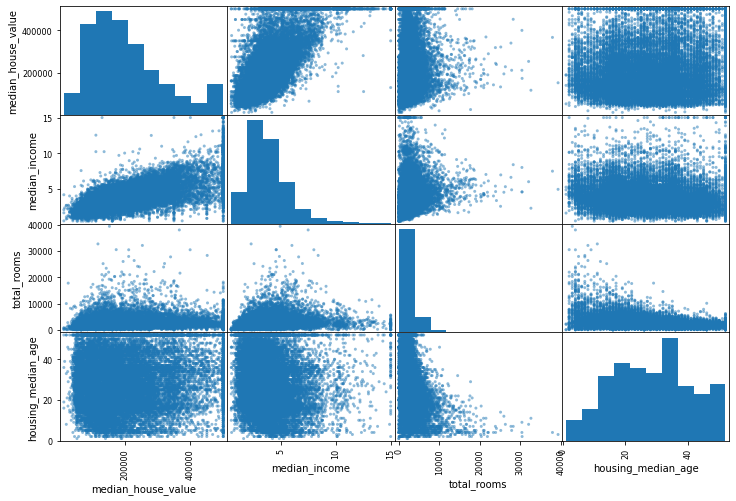

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing_df[attributes], figsize=(12, 8))

In [15]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

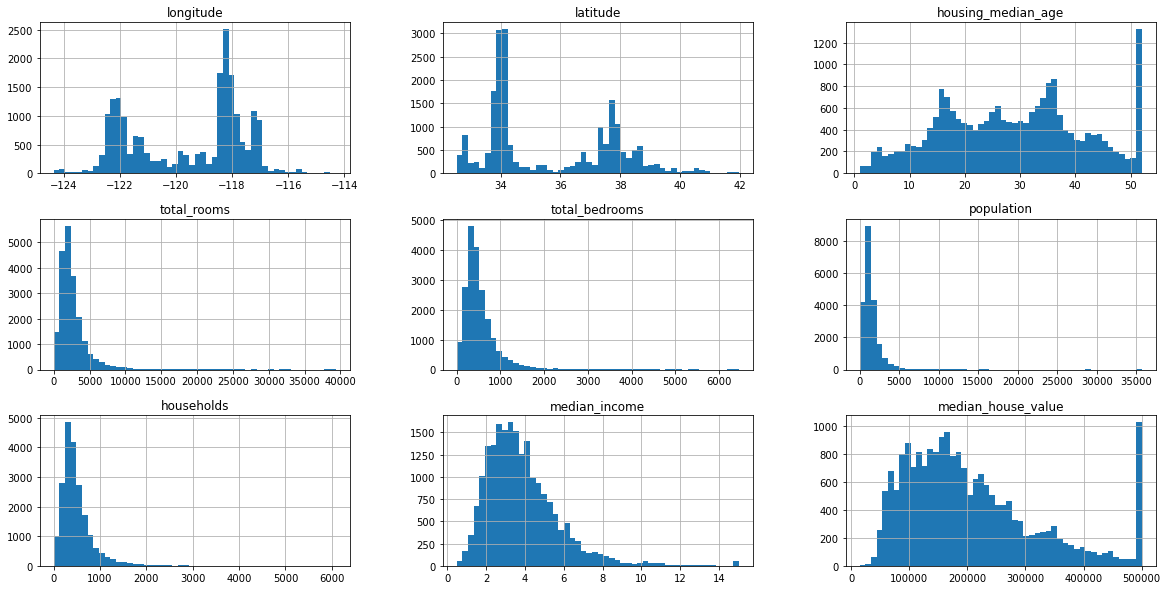

In [16]:
housing_df.hist(bins = 50,figsize=(20,10))

Text(0, 0.5, 'latitude')

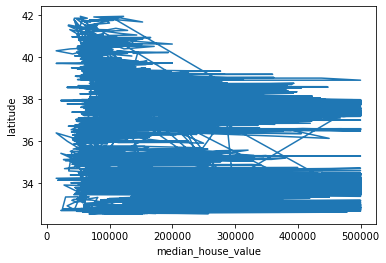

In [17]:
plt.plot(housing_df['median_house_value'],housing_df['latitude'],label='line 1')
# naming the x axis
plt.xlabel('median_house_value')
# naming the y axis
plt.ylabel('latitude')

Text(0, 0.5, 'median_income')

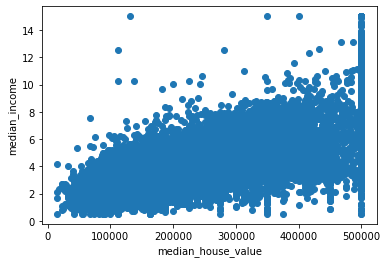

In [18]:
plt.scatter(housing_df['median_house_value'],housing_df['median_income'],label='line 1')
# naming the x axis
plt.xlabel('median_house_value')
# naming the y axis
plt.ylabel('median_income')

Text(0, 0.5, 'latitude')

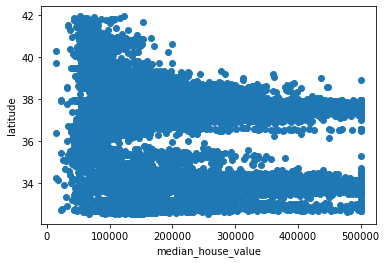

In [19]:
plt.scatter(housing_df['median_house_value'],housing_df['latitude'],label='line 1')
# naming the x axis
plt.xlabel('median_house_value')
# naming the y axis
plt.ylabel('latitude')

In [21]:
import seaborn as sns

In [ ]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)  
sns.stripplot(housing_df.median_house_value, housing_df.median_income, jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()

C:\Users\amittiwa\OneDrive - AMDOCS\DS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [20]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

######################Lets try to split the input data into train and test ########################

In [22]:
import numpy as np

In [23]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # not a perfect way, you might wanna use np.random.seed(42)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    print("length of data: ", len(data) , " test size ",test_set_size , 
              "test indices----" ,test_indices ," ----train indices" , train_indices)
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [24]:
train_set , test_set = split_train_test( housing_df ,0.2)
print(len(train_set) , "train " , len(test_set) ,"test")

length of data:  20640  test size  4128 test indices---- [10638  6379 16444 ... 12630  7266 16610]  ----train indices [ 2837   954  8609 ... 15059 16474 12021]
16512 train  4128 test


    #### Since this split is not perfect ,as running it again and again will give different train and test Set.
        So ,we need to include another approach where we will add an unique identifier in the data frame and 
        compute a hash of each instance’s identifier, keep only the last
        byte of the hash, and put the instance in the test set if this value is lower or equal to
        51 (~20% of 256). This ensures that the test set will remain consistent across multiple
        runs, even if you refresh the dataset

In [25]:
housing_df_with_id = housing_df
housing_df_with_id["id"] = housing_df["longitude"]*1000 +housing_df["latitude"]

In [26]:
import hashlib


In [27]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [28]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    #print("in_test_set  ", in_test_set)
    return data.loc[~in_test_set], data.loc[in_test_set]

In [29]:
train_set, test_set = split_train_test_by_id(housing_df_with_id, 0.2, "id")

In [30]:
#scikit learn provides a utility to the same thing 

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_set , test_set = train_test_split(housing_df,test_size=0.2,random_state=42)

#since median income is an important feature for this dataset ,so we need to make sure that it is evenly
    distributed and the test sampling distribution is similar to full data set.

In [33]:
housing_df["median_income"].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

<AxesSubplot:>

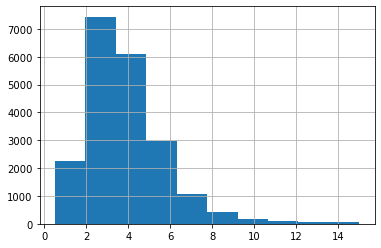

In [34]:
housing_df["median_income"].hist()

#######now since this is now evenly distributed ,and we have majority of points sitting in between 2-5.
    we will create it into categorical data and all the data which is above 5 will be counted as 5

In [35]:
housing_df["income_cat"] = np.ceil(housing_df["median_income"] / 1.5)


In [36]:
housing_df["income_cat"].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [37]:
housing_df["income_cat"].where(housing_df["income_cat"] < 5, 5.0, inplace=True)
housing_df["income_cat"].value_counts()/len(housing_df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

Now we will see the split in the test set for randomly distributed set

In [38]:
train_set , test_set = train_test_split(housing_df,test_size=0.2,random_state=42)
test_set["income_cat"].value_counts()/len(test_set)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

## lets try to handle this via StratifiedShuffleSplit from sklearn.
    This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, 
    which returns stratified randomized folds. 
    The folds are made by preserving the percentage of samples for each class.

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit


In [40]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]
    

In [41]:
print(split)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


In [42]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

#clearly visible that ration/distribution is reserved ,so now we are good to proceed
        lets drop this categorical column now ,to keep the original dataset

In [43]:
strat_test_set = strat_test_set.drop(["income_cat"],axis=1)
strat_train_set = strat_train_set.drop(["income_cat"],axis=1)

In [44]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
 10  id                  4128 non-null   float64
dtypes: float64(10), object(1)
memory usage: 387.0+ KB


In [45]:
##### Visulization

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

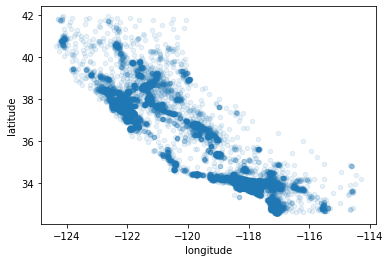

In [46]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices)

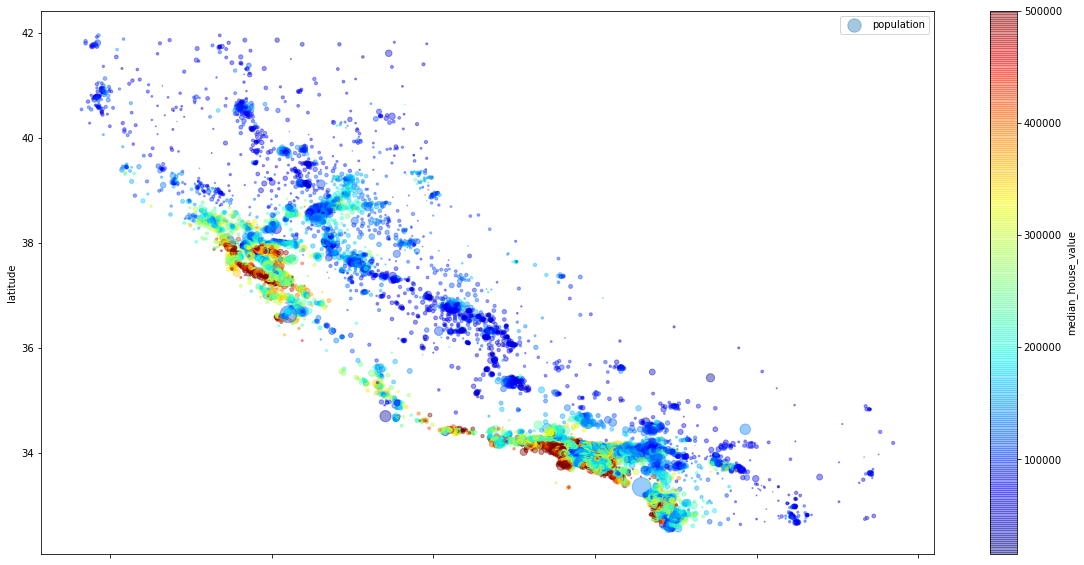

In [47]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing_df["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,figsize=(20,10)
)
plt.legend()

In [48]:
###Lets try to create new feature from the existing features like rooms per household ,
    #bedrooms per room,population per household

In [49]:
housing_df["roomes_per_household"] = housing_df["households"]/housing_df["total_rooms"]
housing_df["bedrooms_per_room"] = housing_df["total_rooms"]/housing_df["total_bedrooms"]
housing_df["population_per_household"] = housing_df["households"]/housing_df["population"]

In [50]:
corr_matrix = housing_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
bedrooms_per_room           0.383920
population_per_household    0.264910
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population                 -0.024650
longitude                  -0.045967
id                         -0.046166
latitude                   -0.144160
roomes_per_household       -0.214654
Name: median_house_value, dtype: float64

# prepare data for ML operations now

In [51]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

##to handle missing values ,we can have three aprroach DataFrame’s dropna(), drop(), and fillna()
    methods:
   housing.dropna(subset=["total_bedrooms"]) # option 1
    housing.drop("total_bedrooms", axis=1) # option 2
    median = housing["total_bedrooms"].median()
    housing["total_bedrooms"].fillna(median) # option 3
    
    However Scikit learn provides a way to handles this ,Imputer class

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
imputer = SimpleImputer(strategy = "median")

#Since the median can only be computed on numerical attributes, we need to create a
    copy of the data without the text attribute ocean_proximity:

In [87]:
housing_numerical = housing.drop("ocean_proximity",axis=1)

In [88]:
housing_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   id                  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [89]:
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

###The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. Only the total_bedrooms attribute had missing
values, but we cannot be sure that there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [90]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
       -1.18475925e+05])

In [91]:
housing_numerical.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
       -1.18475925e+05])

###Now you can use this “trained” imputer to transform the training set by replacing
missing values by the learned medians:

In [92]:
X =  imputer.transform(housing_numerical)

#The result is a plain Numpy array containing the transformed features. If you want to
put it back into a Pandas DataFrame, it’s simple:

In [93]:
housing_transformed = pd.DataFrame(X,columns=housing_numerical.columns)

In [94]:
housing_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   id                  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [95]:
housing_transformed.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
id                    0
dtype: int64

In [96]:
###the categorical attribute ocean_proximity handling

In [97]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_col = housing_df["ocean_proximity"]
encoded_values = encoder.fit_transform(categorical_col)

In [98]:
encoded_values

array([3, 3, 3, ..., 1, 1, 1])

In [99]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


##This encoding is not correct ,as model will learn that 3(encoded value) is near 4 , just because diff is 1.
without considering that 3 and 4 are just encoded values from a string.
So ,we will now try to implement one hot encoding

In [116]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
one_hot_encoded_values = encoder.fit_transform(encoded_values.reshape(-1,1))
one_hot_encoded_values

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

##the output is a SciPy sparse matrix, instead of a NumPy array. This is very
useful when you have categorical attributes with thousands of categories. After onehot
encoding we get a matrix with thousands of columns, and the matrix is full of
zeros except for one 1 per row. Using up tons of memory mostly to store zeros would
be very wasteful, so instead a sparse matrix only stores the location of the nonzero
elements. You can use it mostly like a normal 2D array,19 but if you really want to convert
it to a (dense) NumPy array, just call the toarray() method:

In [101]:
one_hot_encoded_values.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

###We can apply both transformations (from text categories to integer categories, then
from integer categories to one-hot vectors) in one shot using the LabelBinarizer
class:

In [102]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_one_hot_label_bin = encoder.fit_transform(categorical_col)
housing_one_hot_label_bin

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

# Custom Transformers

your transformer to work seamlessly with Scikit-Learn functionalities
(such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance),
all you need is to create a class and implement three methods: fit()
(returning self), transform(), and fit_transform(). You can get the last one for
free by simply adding TransformerMixin as a base class. Also, if you add BaseEstima
tor as a base class (and avoid *args and **kargs in your constructor) you will get
two extra methods (get_params() and set_params()) that will be useful for automatic
hyperparameter tuning.

In [103]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder( BaseEstimator , TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self ,X,y=None):
        return self  #nothing else to do
    
    def transform(self , X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if(self.add_bedrooms_per_room):
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else: 
            return np.c_[X,rooms_per_household,population_per_household]
        

           

In [104]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values) #.values converts into array

In [105]:
df = pd.DataFrame(housing_extra_attribs) #lets see how does our data looks now, 
df

0      1   2     3     4     5     6       7           8       9   \
0     -121.89  37.29  38  1568   351   710   339  2.7042   <1H OCEAN -121853   
1     -121.93  37.05  14   679   108   306   113  6.4214   <1H OCEAN -121893   
2      -117.2  32.77  31  1952   471   936   462  2.8621  NEAR OCEAN -117167   
3     -119.61  36.31  25  1847   371  1460   353  1.8839      INLAND -119574   
4     -118.59  34.23  17  6592  1525  4459  1463  3.0347   <1H OCEAN -118556   
...       ...    ...  ..   ...   ...   ...   ...     ...         ...     ...   
16507 -118.13   34.2  46  1271   236   573   210  4.9312      INLAND -118096   
16508 -117.56  33.88  40  1196   294  1052   258  2.0682      INLAND -117526   
16509  -116.4  34.09   9  4855   872  2098   765  3.2723      INLAND -116366   
16510 -118.01  33.82  31  1960   380  1356   356  4.0625   <1H OCEAN -117976   
16511 -122.45  37.77  52  3095   682  1269   639   3.575    NEAR BAY -122412   

            10       11  
0      4.62537   2.0944  
1      6.00885  2.70796  
2      4.22511  2.02597  
3      5.23229  4.13598  
4      4.50581  3.04785  
...        ...      ...  
16507  6.05238  2.72857  
16508  4.63566  4.07752  
16509  6.34641  2.74248  
16510  5.50562  3.80899  
16511  4.84351  1.98592  

[16512 rows x 12 columns]

In [106]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income ocean_proximity         id  
17606       710.0       339.0         2.7042       <1H OCEAN -121852.71  
18632       306.0       113.0         6.4214       <1H OCEAN -121892.95  
14650       936.0       462.0         2.8621      NEAR OCEAN -117167.23  
3230       1460.0       353.0         1.8839          INLAND -119573.69  
3555       4459.0      1463.0         3.0347       <1H OCEAN -118555.77  
...           ...         ...            ...             ...        ...  
6563        573.0       210.0         4.9312          INLAND -118095.80  
12053      1052.0       258.0         2.0682          INLAND -117526.12  
13908      2098.0       765.0         3.2723          INLAND -116365.91  
11159      1356.0       356.0         4.0625       <1H OCEAN -117976.18  
15775      1269.0       639.0         3.5750        NEAR BAY -122412.23  

[16512 rows x 10 columns]

##Transformation Pipelines
As you can see, there are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for the numerical
attributes:

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  # for feature scaling

num_pipeline = Pipeline([
        ('imputer' , SimpleImputer( strategy = 'median')),
        ('attribute_adder', CombinedAttributesAdder()),
        ('std_scaler' , StandardScaler()),
])

housing_num_attr = num_pipeline.fit_transform(housing_numerical)

In [108]:
df_temp = pd.DataFrame(housing_num_attr)
df_temp

0         1         2         3         4         5         6   \
0     -1.156043  0.771950  0.743331 -0.493234 -0.445438 -0.636211 -0.420698   
1     -1.176025  0.659695 -1.165317 -0.908967 -1.036928 -0.998331 -1.022227   
2      1.186849 -1.342183  0.186642 -0.313660 -0.153345 -0.433639 -0.093318   
3     -0.017068  0.313576 -0.290520 -0.362762 -0.396756  0.036041 -0.383436   
4      0.492474 -0.659299 -0.926736  1.856193  2.412211  2.724154  2.570975   
...         ...       ...       ...       ...       ...       ...       ...   
16507  0.722267 -0.673331  1.379547 -0.632123 -0.725361 -0.759010 -0.764049   
16508  1.007011 -0.823004  0.902385 -0.667196 -0.584183 -0.329664 -0.636291   
16509  1.586489 -0.724781 -1.562952  1.043901  0.822735  0.607904  0.713156   
16510  0.782213 -0.851068  0.186642 -0.309919 -0.374849 -0.057178 -0.375451   
16511 -1.435791  0.996459  1.856709  0.220853  0.360253 -0.135159  0.377791   

             7         8         9         10        11  
0     -0.614937 -1.156360 -0.312055 -0.086499  0.155318  
1      1.336459 -1.176482  0.217683 -0.033534 -0.836289  
2     -0.532046  1.186587 -0.465315 -0.092405  0.422200  
3     -1.045566 -0.016749 -0.079661  0.089736 -0.196453  
4     -0.441437  0.492256 -0.357834 -0.004194  0.269928  
...         ...       ...       ...       ...       ...  
16507  0.554158  0.722261  0.234352 -0.031755 -0.428853  
16508 -0.948815  1.007126 -0.308114  0.084689  0.491503  
16509 -0.316705  1.587282  0.346934 -0.030554 -0.521776  
16510  0.098121  0.782076  0.024995  0.061509 -0.303407  
16511 -0.157799 -1.436145 -0.228529 -0.095863  0.101806  

[16512 rows x 12 columns]

        ##Pipeline Union , where we can have diff pipelines setup and then can combine them

In [109]:
housing_numerical = housing_numerical.drop("id", axis =1) #lets drop id column

In [110]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator , TransformerMixin):
    def __init__(self,attribute_name_list):
        self.attribute_name_list = attribute_name_list
        
    def fit(self ,X,y=None):
        return self
    
    def transform(self ,X):
        return X[self.attribute_name_list].values
    
    

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion


numerical_attr = list(housing_numerical)
categorical_attr = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector' , DataFrameSelector(numerical_attr)),
    ('Imputer' , SimpleImputer(strategy='median')),
    ('attribute_adder', CombinedAttributesAdder()),
    ('std_scaler' , StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(categorical_attr)),
    ('one_hot_encoder' , OneHotEncoder(sparse=False)),
])

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', categorical_pipeline),
])

In [123]:
housing_numerical.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [124]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'id'],
      dtype='object')

In [125]:
full_prepared = full_pipeline.fit_transform(housing)

In [126]:
full_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [127]:
full_prepared.shape

(16512, 16)

# Training and Evaluating on the Training Set
The good news is that thanks to all these previous steps, things are now going to be
much simpler than you might think. Let’s first train a Linear Regression model

In [128]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(full_prepared , housing_labels)

LinearRegression()

        ###Done! You now have a working Linear Regression model. Let’s try it out on a few
        instances from the training set:

In [135]:
some_data = housing.iloc[:5]
some_data_label = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [136]:
print("Pridiction \n" , linear_reg.predict(some_data_prepared))

Pridiction 
 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [137]:
print("Labels \n", list(some_data_label))

Labels 
 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


    ##lets check how model performs ,by using RMSE

In [139]:
from sklearn.metrics import mean_squared_error
housing_preds = linear_reg.predict(full_prepared)
lin_mse = mean_squared_error( housing_labels,housing_preds  )
lin_rmse = np.sqrt(lin_mse)
print("lin_rmse \t" , lin_rmse)

lin_rmse 	 68628.19819848923


    ## model is not performing well ,as margin/diff of 68628$ is a significant amount in our case,
              this is an example of under fitting ,lets try using other model

Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding
complex nonlinear relationships in the data

In [141]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

tree_reg.fit( full_prepared,housing_labels)


DecisionTreeRegressor()

In [142]:
housing_preds = tree_reg.predict(full_prepared)
tree_mse = mean_squared_error(housing_labels, housing_preds)
print("tree_mse \t" , tree_mse)

tree_rmse = np.sqrt(tree_mse)
print("tree_rmse \t", tree_rmse)

tree_mse 	 0.0
tree_rmse 	 0.0


### Model is badly overfitting as of now
    

        # Better Evaluation Using Cross-Validation

In [143]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg ,full_prepared ,housing_labels,scoring ='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)

In [144]:
def display_scores(scores):
    print("scores: " ,scores )
    print("Mean: " , scores.mean())
    print("standard deviation: " , scores.std())

In [145]:
display_scores(rmse_scores)

scores:  [67245.2819873  68617.39976515 71491.35368874 69359.26994364
 71115.11029974 74638.88477012 70840.58917841 69509.06605096
 77151.93959143 70860.99387522]
Mean:  71082.98891507045
standard deviation:  2756.9540300871345


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform
worse than the Linear Regression model! Notice that cross-validation allows
you to get not only an estimate of the performance of your model, but also a measure
of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a
score of approximately 71,200, generally ±3,200. You would not have this information
if you just used one validation set. But cross-validation comes at the cost of training
the model several times, so it is not always possible.

        Let’s compute the same scores for the Linear Regression model just to be sure:

In [147]:
scores = cross_val_score(linear_reg ,full_prepared ,housing_labels,scoring ='neg_mean_squared_error',cv=10)
lmse_scores = np.sqrt(-scores)
display_scores(lmse_scores)

scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
standard deviation:  2731.6740017983493


            That’s right: the Decision Tree model is overfitting so badly that it performs worse
                than the Linear Regression model.

            Let’s try one last model now: the RandomForestRegressor

In [150]:
from sklearn.ensemble import RandomForestRegressor

random_reg = RandomForestRegressor()
random_reg.fit( full_prepared , housing_labels)

housing_pred = random_reg.predict(full_prepared)
ran_mse = mean_squared_error(housing_labels ,housing_pred)
ran_rmse = np.sqrt(ran_mse)
print("RMSE for Random tree: \t", ran_rmse)

score_rand_tree = cross_val_score(random_reg, full_prepared, housing_labels ,
                                  scoring = 'neg_mean_squared_error' , cv=10)



RMSE for Random tree: 	 18615.647239326587
scores:  [-2.43374589e+09 -2.26539120e+09 -2.50762303e+09 -2.74714010e+09
 -2.43523928e+09 -2.80114802e+09 -2.38365129e+09 -2.31129285e+09
 -2.82346392e+09 -2.51522268e+09]
Mean:  -2522391826.6814246
standard deviation:  190904537.05154532


In [151]:
display_scores( np.sqrt(-score_rand_tree))

scores:  [49333.01018499 47596.12593888 50076.17231959 52413.16719353
 49348.14361198 52925.87290241 48822.65135512 48075.90717132
 53136.27685675 50151.99582028]
Mean:  50187.932335484795
standard deviation:  1887.6637863306903


In [154]:
 import joblib
joblib.dump(random_reg, "housing_random_regressor.pkl") #and later # and later... my_model_loaded = joblib.load("my_model.pkl")
joblib.dump(linear_reg, "housing_linear_regressor.pkl")
joblib.dump(tree_reg, "housing_tree_regressor.pkl")

['housing_tree_regressor.pkl']